In [1]:
import ee


# ee.Authenticate()

In [2]:
import sys

try:
    # Initialize the library.
    ee.Initialize()
    print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
    print(e)
    print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise


Google Earth Engine has initialized successfully!


In [13]:
import geemap
# Map1 = geemap.Map(center=[50.424573, 10.822447], zoom=15)
# Map1.addLayer(img2, vis_params, "MedianImage", True) 
# Map1


Map(center=[50.424573, 10.822447], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [17]:
# fc = ee.FeatureCollection(Map1.draw_last_feature)
# region = fc.geometry()
# cords = region.getInfo()['coordinates']
# cords

In [39]:
region = ee.Geometry.Polygon([[[10.821064, 50.428389],
  [10.818103, 50.427378],
  [10.817845, 50.424343],
  [10.816343, 50.423031],
  [10.817545, 50.421964],
  [10.817802, 50.419203],
  [10.818875, 50.41841],
  [10.820635, 50.419285],
  [10.819948, 50.419914],
  [10.82042, 50.422183],
  [10.822094, 50.421964],
  [10.823382, 50.421335],
  [10.823339, 50.420843],
  [10.823768, 50.42046],
  [10.828017, 50.424234],
  [10.82969, 50.424534],
  [10.83072, 50.42437],
  [10.831064, 50.425382],
  [10.823167, 50.427077],
  [10.821064, 50.428389]]])

In [40]:
myCollection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(region) \
    .filterDate('2017-06-01', '2017-08-30') \
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 50)

Number of images in the collection:  ['20170616T102021_20170616T102331_T32UPA', '20170619T103021_20170619T103021_T32UPA', '20170719T103021_20170719T103023_T32UPA', '20170805T102031_20170805T102535_T32UPA', '20170815T102021_20170815T102513_T32UPA', '20170825T102021_20170825T102114_T32UPA']


In [41]:
listOfImages = myCollection.aggregate_array('system:index').getInfo()
print('Number of images in the collection: ', listOfImages)

In [36]:
vis_params = {"min": 0, 
              "max": 1500, 
              "bands": ["B4", "B3", "B2"]}


Map(center=[50.414346, 10.827031], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [23]:
Map2 = geemap.Map(center=[50.414346, 10.827031], zoom=15)
img2 = myCollection.median().clip(region)
Map2.addLayer(img2, vis_params, "MedianImage", True) 
Map2

['20170815T102021_20170815T102513_T32UPA', '20170825T102021_20170825T102114_T32UPA']


Map(center=[50.414346, 10.827031], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [25]:
myCollection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(region) \
    .filterDate('2017-08-7', '2017-08-30') \
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 50)
print(myCollection.aggregate_array('system:index').getInfo())
Map3 = geemap.Map(center=[50.414346, 10.827031], zoom=15)
img3 = myCollection.first().clip(region)
Map3.addLayer(img3, vis_params, "MedianImage", True) 
Map3

['20170825T102021_20170825T102114_T32UPA']


Map(center=[50.414346, 10.827031], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [42]:
myCollection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(region) \
    .filterDate('2017-08-16', '2017-08-30') \
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 50)
print(myCollection.aggregate_array('system:index').getInfo())
Map3 = geemap.Map(center=[50.414346, 10.827031], zoom=15)
img3 = myCollection.first().clip(region)
Map3.addLayer(img3, vis_params, "MedianImage", True) 
Map3

The ee_object must be an ee.Image.


In [44]:
import os

out_dir = os.path.join(os.path.expanduser('~'), 'KasAndBrot')
filename = out_dir + myCollection.aggregate_array('system:index').getInfo()[0] + '.tif'
geemap.ee_export_image(
    myCollection, filename=filename, scale=30, region=region, file_per_band=False
)

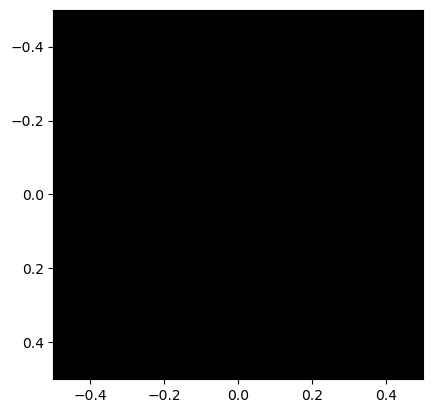

In [50]:
import geetools
#for band in bands:
tasks = geetools.batch.Export.imagecollection.toDrive(
    collection=myCollection, 
    folder='KasAndBrot',
    scale= 20000,
    #namePattern= name_pattern,
    region= region)

In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np 
with rasterio.open("KasAndBrot/20170616T102021_20170616T102331_T32UPA.tif", 'r') as ds:
    img = ds.read()  # read all raster values

img = img[0:12,:,:] # 12 spectral bands
img = np.transpose(img, [1, 2, 0]) # numpy array [row, col, bands]

img_rgb = img[:,:,[3,2,1]]

def MyNormalize(img_i,sigma):
    nr,nc,nb = img_i.shape
    img_n = np.zeros(shape=(nr,nc,nb))
    for i in range(0,nb):
        one_band = img_i[:,:,i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
        img_n[:,:,i] = sigma*one_band
    return img_n

plt.imshow(MyNormalize(img_rgb,1))

